# Regularizacija

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model

In [3]:
np.random.seed(23)

Posmatrajmo jedan sintetički skup podataka u kojem su atributi korelisani. Proverimo kako ovo svojstvo skupa podata utiču na koeficijente regresionog modela ukoliko se koriste različite regularizacije. 

Skup koji ćemo generisati će imati 100 instanci.

In [4]:
N = 100

Dalje ćemo generisati vrednosti atributa. Između prvog i drugog atributa će postojati linearna zavisnost, između prvog i trećeg atributa će postojati mala razlika u vidu šuma iz normalne raspodele $N(0, 1)$.

In [5]:
X1 = np.random.uniform(-1, 1, N)
X2 = np.random.uniform(-1, 1, N)

X = np.vstack([X1, 4*X1, X1 + np.random.normal(0, 1, N), X2]).transpose()

Korelacije između atributa možemo prikazati i toplotnom mapom. 

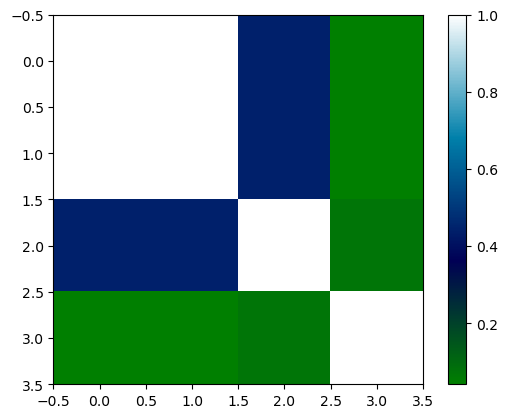

In [6]:
plt.imshow(np.corrcoef(X.T), cmap='ocean')
plt.colorbar()
plt.show()

Vrednost ciljne promenljive je linearna kombinacija atributa X1 i X2.

In [7]:
y = (2 + np.random.normal(size=N))*X1 + (3 + np.random.normal(size=N))*X2

Pošto nas zanima kako se ponašaju koeficijenti modela, za treniranje ćemo koristiti ceo skup. Posmatraćemo linearni model, model grebene regresije, linearni model sa laso regularizacijom i linearni model sa ElasticNet regularizacijom. Nećemo se baviti ni određivanjem optimalnih vrednosti hiperparametara ovih modela jer nas prevashodno zanima ponašanje koeficijenata.

### 1. Linearna regresija

In [8]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
model.score(X, y)

0.9096550568510708

In [10]:
model.coef_

array([0.10157081, 0.40628325, 0.07855786, 2.88608866])

### 2. Grebena linearna regresija (linearna regresija sa l2 regularizacijom)

In [11]:
ridge_model = linear_model.Ridge(alpha=0.2)
ridge_model.fit(X, y)

Ridge(alpha=0.2)

In [12]:
ridge_model.score(X, y)

0.909631949282924

In [13]:
ridge_model.coef_

array([0.10154992, 0.40619969, 0.07921178, 2.86842588])

### 3. Linearna regresija sa Laso regularizacijom (l1 regularizacijom)

In [14]:
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X, y)

Lasso(alpha=0.1)

In [15]:
lasso_model.score(X, y)

0.9012938600028955

In [16]:
lasso_model.coef_

array([0.        , 0.43124743, 0.        , 2.58888578])

### 4. Linearna regresija sa  ElasticNet regularizacijom (kombinacija l1 i l2 regularizacije)

In [17]:
elastic_model = linear_model.ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X, y)

ElasticNet(alpha=1)

In [18]:
elastic_model.score(X, y)

0.4800011500939738

In [19]:
elastic_model.coef_

array([0.        , 0.34881454, 0.        , 0.54304144])

### Grafički prikaz vrednosti koeficijenata

Razlike u vrednostima koeficijenata ćemo prikazati grafički.

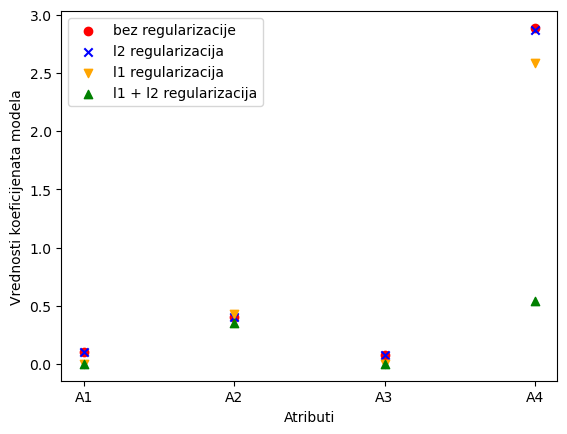

In [20]:
number_of_features = X.shape[1]
plt.xlabel('Atributi')
plt.xticks(np.arange(0, number_of_features), ['A1', 'A2', 'A3', 'A4'])
plt.ylabel('Vrednosti koeficijenata modela')
plt.scatter(np.arange(0, number_of_features), model.coef_, color='red', marker='o', label='bez regularizacije' )
plt.scatter(np.arange(0, number_of_features), ridge_model.coef_, color='blue', marker='x', label='l2 regularizacija')
plt.scatter(np.arange(0, number_of_features), lasso_model.coef_, color='orange', marker='v', label='l1 regularizacija')
plt.scatter(np.arange(0, number_of_features), elastic_model.coef_, color='green', marker='^', label='l1 + l2 regularizacija')
plt.legend(loc='best')
plt.show()

Kao što možemo primetiti, prisustvo l1 regularizacije koeficijente koji stoje uz atribute A1 i A3 svodi na nulu. 